# 1. XGBoost

In [1]:
from sklearn import datasets
import xgboost as xgb

In [27]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [30]:
D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)

In [31]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [32]:
model = xgb.train(param, D_train, steps)

In [33]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))

Precision = 0.9399509803921569
Recall = 0.9399509803921569
Accuracy = 0.9333333333333333


In [34]:
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...ight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'eta': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'gamma': [0.0, 0.1, 0.

In [9]:
model.dump_model('dump.raw.txt')

Source Code from YouTube Video: https://www.youtube.com/watch?v=TyvYZ26alZs

In [37]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

In [38]:
mnist = pd.read_csv("mnist_train_small.csv")
mnist.head()
x = mnist[mnist.columns.difference(["value"])]
y = mnist["value"]
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.3)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.3)


In [39]:
model = RandomForestRegressor(50, max_depth=15, max_features=15)
model.fit(x_train, y_train)
print(model.score(x_val, y_val))

0.7928490550873102


In [40]:
model2 = XGBClassifier(objective='multiclass:softmax', learning_rate = 0.1,
              max_depth = 1, n_estimators = 330)
model2.fit(x_train, y_train)
preds = model2.predict(x_test)
print(sum(preds==y_test)/len(y_test))

0.8683333333333333


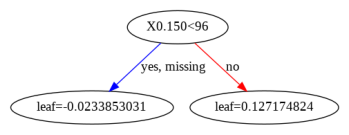

In [41]:
plot_tree(model2._Booster, num_trees=3)

Source Code from the TechCave Guide: https://techcave.ru/posts/81-sozdaem-pervuyu-xgboost-model-na-python-s-ispolzovaniem-scikit-learn.html

In [15]:
from sklearn.model_selection import cross_validate

In [16]:
# load data
dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=",")

In [17]:
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

In [18]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [19]:
# fit model no training data
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [20]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [21]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [22]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


# 2. LightGBM
Source Code from PythonRu: https://pythonru.com/biblioteki/lightgbm

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import sklearn

import warnings
warnings.filterwarnings("ignore")

print("Версия LightGBM      : ", lgb.__version__)
print("Версия Scikit-Learn  : ", sklearn.__version__)

Версия LightGBM      :  2.2.3
Версия Scikit-Learn  :  0.22.2.post1


In [43]:
#Boston Housing Dataset
from sklearn.datasets import load_boston

boston = load_boston()

for line in boston.DESCR.split("\n")[5:29]:
    print(line)

boston_df = pd.DataFrame(data=boston.data, columns = boston.feature_names)
boston_df["Price"] = boston.target

boston_df.head()

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
#Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

for line in breast_cancer.DESCR.split("\n")[5:31]:
    print(line)

breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns = breast_cancer.feature_names)
breast_cancer_df["TumorType"] = breast_cancer.target

breast_cancer_df.head()

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
            

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TumorType
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [45]:
#Wine Dataset
from sklearn.datasets import load_wine

wine = load_wine()

for line in wine.DESCR.split("\n")[5:29]:
    print(line)

wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df["WineType"] = wine.target

wine_df.head()

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WineType
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


2.1.1 Regression

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Размеры Train/Test: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=boston.feature_names.tolist())
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=boston.feature_names.tolist())

booster = lgb.train({"objective": "regression"},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=10)

Размеры Train/Test:  (379, 13) (127, 13) (379,) (127,)
[1]	valid_0's l2: 67.3933
[2]	valid_0's l2: 56.4628
[3]	valid_0's l2: 47.7123
[4]	valid_0's l2: 40.8653
[5]	valid_0's l2: 35.4292
[6]	valid_0's l2: 31.2415
[7]	valid_0's l2: 27.566
[8]	valid_0's l2: 24.5808
[9]	valid_0's l2: 22.0763
[10]	valid_0's l2: 19.9336


In [ ]:
test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

test_preds = np.argmax(test_preds, axis=0)
train_preds = np.argmax(train_preds, axis=0)

print("\nTest Accuracy: %.2f"%accuracy_score(Y_test, test_preds))
print("Train Accuracy: %.2f"%accuracy_score(Y_train, train_preds))

In [47]:
idxs = booster.predict(X_test, pred_leaf=True)

print("Размерность: ", idxs.shape)

idxs

Размерность:  (127, 10)


array([[10, 10, 11, ..., 12,  6, 12],
       [ 8,  9, 10, ...,  5,  8,  5],
       [10, 10, 11, ..., 12,  6,  9],
       ...,
       [ 3,  3,  3, ...,  3,  0,  4],
       [ 0,  7,  9, ...,  6,  1,  0],
       [ 4,  4,  6, ...,  4,  2,  2]], dtype=int32)

In [ ]:
shap_vals = booster.predict(X_test, pred_contrib=True)

print("Размерность: ", shap_vals.shape)

print("\nЗначения Shap для нулевого семпла: ", shap_vals[0])
print("\nПредсказания с использованием значений SHAP: ", shap_vals[0].sum())
print("Предсказания без SHAP: ", test_preds[0])

2.1.2 Binary Classification

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)

print("Размеры Train/Test: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=breast_cancer.feature_names.tolist())
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=breast_cancer.feature_names.tolist())


booster = lgb.train({"objective": "binary", "verbosity": -1},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=10)

from sklearn.metrics import accuracy_score


test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

test_preds = [1 if pred > 0.5 else 0 for pred in test_preds]
train_preds = [1 if pred > 0.5 else 0 for pred in train_preds]

print("Test Accuracy: %.2f"%accuracy_score(Y_test, test_preds))
print("Train Accuracy: %.2f"%accuracy_score(Y_train, train_preds))

Размеры Train/Test:  (426, 30) (143, 30) (426,) (143,)
[1]	valid_0's binary_logloss: 0.595162
[2]	valid_0's binary_logloss: 0.53532
[3]	valid_0's binary_logloss: 0.487575
[4]	valid_0's binary_logloss: 0.447168
[5]	valid_0's binary_logloss: 0.411594
[6]	valid_0's binary_logloss: 0.382144
[7]	valid_0's binary_logloss: 0.351517
[8]	valid_0's binary_logloss: 0.330715
[9]	valid_0's binary_logloss: 0.307966
[10]	valid_0's binary_logloss: 0.287682
Test Accuracy: 0.92
Train Accuracy: 0.97


2.1.3 Multiclass Classification

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(wine.data, wine.target)

print("Размеры Train/Test: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=wine.feature_names)
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=wine.feature_names)


booster = lgb.train({"objective": "multiclass", "num_class": 3, "verbosity": -1},
                    train_set=train_dataset, valid_sets=(test_dataset,),
                    num_boost_round=10)

from sklearn.metrics import accuracy_score


test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

test_preds = np.argmax(test_preds, axis=1)
train_preds = np.argmax(train_preds, axis=1)

print("\nTest Accuracy: %.2f"%accuracy_score(Y_test, test_preds))
print("Train Accuracy: %.2f"%accuracy_score(Y_train, train_preds))

Размеры Train/Test:  (133, 13) (45, 13) (133,) (45,)
[1]	valid_0's multi_logloss: 0.984295
[2]	valid_0's multi_logloss: 0.892239
[3]	valid_0's multi_logloss: 0.812691
[4]	valid_0's multi_logloss: 0.744607
[5]	valid_0's multi_logloss: 0.686938
[6]	valid_0's multi_logloss: 0.635265
[7]	valid_0's multi_logloss: 0.588427
[8]	valid_0's multi_logloss: 0.542424
[9]	valid_0's multi_logloss: 0.508125
[10]	valid_0's multi_logloss: 0.468814

Test Accuracy: 1.00
Train Accuracy: 0.98


**LGBMModel**

2.2.1 Regression


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Размеры Train/Test Sizes: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMModel(objective="regression", n_estimators=10)

booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test),], eval_metric="rmse")

from sklearn.metrics import r2_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("\nTest  R2 Score: %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score: %.2f"%r2_score(Y_train, train_preds))

Размеры Train/Test Sizes:  (379, 13) (127, 13) (379,) (127,)
[1]	valid_0's rmse: 8.40383	valid_0's l2: 70.6243
[2]	valid_0's rmse: 7.86678	valid_0's l2: 61.8863
[3]	valid_0's rmse: 7.3933	valid_0's l2: 54.6608
[4]	valid_0's rmse: 6.99569	valid_0's l2: 48.9397
[5]	valid_0's rmse: 6.65659	valid_0's l2: 44.3101
[6]	valid_0's rmse: 6.35359	valid_0's l2: 40.3681
[7]	valid_0's rmse: 6.11303	valid_0's l2: 37.3691
[8]	valid_0's rmse: 5.89904	valid_0's l2: 34.7987
[9]	valid_0's rmse: 5.71849	valid_0's l2: 32.7011
[10]	valid_0's rmse: 5.54449	valid_0's l2: 30.7414

Test  R2 Score: 0.62
Train R2 Score: 0.76


2.2.2 Binary Classification

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Размеры Train/Test Sizes: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMModel(objective="regression", n_estimators=10)

booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test),], eval_metric="rmse")

from sklearn.metrics import r2_score

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

print("\nTest  R2 Score: %.2f"%r2_score(Y_test, test_preds))
print("Train R2 Score: %.2f"%r2_score(Y_train, train_preds))

Размеры Train/Test Sizes:  (379, 13) (127, 13) (379,) (127,)
[1]	valid_0's rmse: 8.74257	valid_0's l2: 76.4326
[2]	valid_0's rmse: 8.04338	valid_0's l2: 64.6959
[3]	valid_0's rmse: 7.43814	valid_0's l2: 55.326
[4]	valid_0's rmse: 6.91689	valid_0's l2: 47.8434
[5]	valid_0's rmse: 6.46216	valid_0's l2: 41.7595
[6]	valid_0's rmse: 6.06876	valid_0's l2: 36.8298
[7]	valid_0's rmse: 5.74787	valid_0's l2: 33.0381
[8]	valid_0's rmse: 5.44787	valid_0's l2: 29.6792
[9]	valid_0's rmse: 5.20597	valid_0's l2: 27.1021
[10]	valid_0's rmse: 5.00827	valid_0's l2: 25.0828

Test  R2 Score: 0.72
Train R2 Score: 0.75


**LGBMRegressor**

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target)

print("Размеры Train/Test Sizes: ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

booster = lgb.LGBMRegressor(objective="regression_l2", n_estimators=10,)

booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test),], eval_metric=["rmse", "l2", "l1"])

print("Test  R2 Score: %.2f"%booster.score(X_train, Y_train))
print("Train R2 Score: %.2f"%booster.score(X_test, Y_test))

Размеры Train/Test Sizes:  (379, 13) (127, 13) (379,) (127,)
[1]	valid_0's l2: 57.523	valid_0's l2: 57.523	valid_0's rmse: 7.58439	valid_0's l1: 5.65997
[2]	valid_0's l2: 50.3825	valid_0's l2: 50.3825	valid_0's rmse: 7.09806	valid_0's l1: 5.27275
[3]	valid_0's l2: 43.6074	valid_0's l2: 43.6074	valid_0's rmse: 6.60359	valid_0's l1: 4.87778
[4]	valid_0's l2: 38.736	valid_0's l2: 38.736	valid_0's rmse: 6.22382	valid_0's l1: 4.55725
[5]	valid_0's l2: 34.1981	valid_0's l2: 34.1981	valid_0's rmse: 5.84792	valid_0's l1: 4.24038
[6]	valid_0's l2: 30.8559	valid_0's l2: 30.8559	valid_0's rmse: 5.55481	valid_0's l1: 3.97546
[7]	valid_0's l2: 27.9037	valid_0's l2: 27.9037	valid_0's rmse: 5.28239	valid_0's l1: 3.71507
[8]	valid_0's l2: 25.6686	valid_0's l2: 25.6686	valid_0's rmse: 5.06642	valid_0's l1: 3.51015
[9]	valid_0's l2: 23.9645	valid_0's l2: 23.9645	valid_0's rmse: 4.89536	valid_0's l1: 3.35391
[10]	valid_0's l2: 22.2054	valid_0's l2: 22.2054	valid_0's rmse: 4.71226	valid_0's l1: 3.17231
Te

**LGBMClassifier**

2.3.1 Binary Classification

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)
booster = lgb.LGBMClassifier(objective="binary", n_estimators=10)
booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test),])

print("Test  Accuracy: %.2f"%booster.score(X_test, Y_test))
print("Train Accuracy: %.2f"%booster.score(X_train, Y_train))

[1]	valid_0's binary_logloss: 0.575596
[2]	valid_0's binary_logloss: 0.515173
[3]	valid_0's binary_logloss: 0.465035
[4]	valid_0's binary_logloss: 0.422387
[5]	valid_0's binary_logloss: 0.387316
[6]	valid_0's binary_logloss: 0.358904
[7]	valid_0's binary_logloss: 0.331114
[8]	valid_0's binary_logloss: 0.308851
[9]	valid_0's binary_logloss: 0.287381
[10]	valid_0's binary_logloss: 0.267605
Test  Accuracy: 0.96
Train Accuracy: 0.98


2.3.2. Multiclass Classification

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(wine.data, wine.target)
booster = lgb.LGBMClassifier(objective="multiclassova", n_estimators=10, num_class=3)
booster.fit(X_train, Y_train, eval_set=[(X_test, Y_test),])

print("Test  Accuracy: %.2f"%booster.score(X_test, Y_test))
print("Train Accuracy: %.2f"%booster.score(X_train, Y_train))

[1]	valid_0's multi_logloss: 0.964804
[2]	valid_0's multi_logloss: 0.863061
[3]	valid_0's multi_logloss: 0.77882
[4]	valid_0's multi_logloss: 0.714854
[5]	valid_0's multi_logloss: 0.660575
[6]	valid_0's multi_logloss: 0.605208
[7]	valid_0's multi_logloss: 0.567885
[8]	valid_0's multi_logloss: 0.542413
[9]	valid_0's multi_logloss: 0.507145
[10]	valid_0's multi_logloss: 0.479013
Test  Accuracy: 0.91
Train Accuracy: 1.00


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit


X_train, X_test, Y_train, Y_test = train_test_split(breast_cancer.data, breast_cancer.target)

train_dataset = lgb.Dataset(X_train, Y_train, feature_name=breast_cancer.feature_names.tolist())
test_dataset = lgb.Dataset(X_test, Y_test, feature_name=breast_cancer.feature_names.tolist())

lgb.cv({"objective": "binary", "verbosity": -1},
       train_set=test_dataset, num_boost_round=10,
       nfold=5, stratified=True, shuffle=True,
       verbose_eval=True)

cv_output = lgb.cv({"objective": "binary", "verbosity": -1},
                   train_set=test_dataset, num_boost_round=10,
                   metrics=["auc", "average_precision"],
                   folds=StratifiedShuffleSplit(n_splits=3),
                   verbose_eval=True,
                   return_cvbooster=True)

for key, val in cv_output.items():
    print("\n" + key, " : ", val)

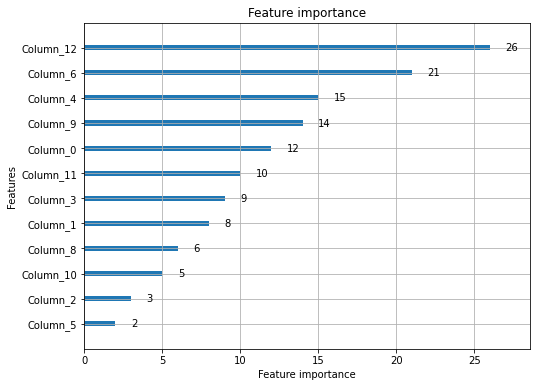

In [66]:
lgb.plot_importance(booster, figsize=(8,6))

>10 0.857 (0.033)
>50 0.916 (0.032)
>100 0.925 (0.031)
>500 0.938 (0.026)
>1000 0.938 (0.028)
>5000 0.937 (0.028)


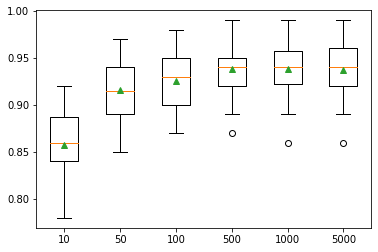

In [71]:
# explore lightgbm number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
  X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
  return X, y

# get a list of models to evaluate
def get_models():
  models = dict()
  trees = [10, 50, 100, 500, 1000, 5000]
  for n in trees:
    models[str(n)] = LGBMClassifier(n_estimators=n)
  return models

# evaluate a give model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# 3. CatBoost

In [73]:
!pip install catboost
from catboost import CatBoostRegressor
# Initialize data

train_data = [[1, 4, 5, 6],
              [4, 5, 6, 7],
              [30, 40, 50, 60]]

eval_data = [[2, 4, 6, 8],
             [1, 4, 50, 60]]

train_labels = [10, 20, 30]
# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)
# Fit model
model.fit(train_data, train_labels)
# Get predictions
preds = model.predict(eval_data)

     |████████████████████████████████| 76.4 MB 36 kB/s 
0:	learn: 6.1237244	total: 46.3ms	remaining: 46.3ms
1:	learn: 4.5927933	total: 47.1ms	remaining: 0us


In [74]:
print(preds)

[15.625 18.125]


In [75]:
from catboost import Pool, CatBoostClassifier

train_data = [["summer", 1924, 44],
              ["summer", 1932, 37],
              ["winter", 1980, 37],
              ["summer", 2012, 204]]

eval_data = [["winter", 1996, 197],
             ["winter", 1968, 37],
             ["summer", 2002, 77],
             ["summer", 1948, 59]]

cat_features = [0]

train_label = ["France", "USA", "USA", "UK"]
eval_label = ["USA", "France", "USA", "UK"]


train_dataset = Pool(data=train_data,
                     label=train_label,
                     cat_features=cat_features)

eval_dataset = Pool(data=eval_data,
                    label=eval_label,
                    cat_features=cat_features)

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=10,
                           learning_rate=1,
                           depth=2,
                           loss_function='MultiClass')
# Fit model
model.fit(train_dataset)
# Get predicted classes
preds_class = model.predict(eval_dataset)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(eval_dataset)
# Get predicted RawFormulaVal
preds_raw = model.predict(eval_dataset,
                          prediction_type='RawFormulaVal')

0:	learn: 0.9417331	total: 284us	remaining: 2.56ms
1:	learn: 0.8421839	total: 424us	remaining: 1.7ms
2:	learn: 0.6597822	total: 521us	remaining: 1.22ms
3:	learn: 0.6028493	total: 614us	remaining: 921us
4:	learn: 0.4900112	total: 766us	remaining: 766us
5:	learn: 0.4076408	total: 857us	remaining: 571us
6:	learn: 0.3458205	total: 947us	remaining: 405us
7:	learn: 0.2982687	total: 1.04ms	remaining: 259us
8:	learn: 0.2608927	total: 1.14ms	remaining: 126us
9:	learn: 0.2309514	total: 1.42ms	remaining: 0us


In [76]:
print(preds_class)

[['USA']
 ['USA']
 ['UK']
 ['USA']]


In [78]:
print(preds_raw)

[[-0.43157053 -0.07602515  0.50759567]
 [-0.75475564 -0.95110009  1.70585572]
 [-0.15318701  0.36823989 -0.21505288]
 [-0.04081236 -0.7956756   0.83648797]]
